In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from pyswarm import pso

In [3]:
# Load the dataset
try:
    data = pd.read_csv(r"C:\Users\devan\c++\heart.csv")
    
except Exception as e:
    print("Error loading dataset:", e)
    exit(1)
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [4]:



# Split the data into features and target variable
X = data.drop('target', axis=1)  # Replace 'target' with the actual name of your target column
y = data['target']  # Replace 'target' with the actual name of your target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")


Data preprocessing completed.


In [5]:
# Preprocess the data
#X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(data)
#print("Data preprocessed successfully.")

In [6]:
import numpy as np

In [7]:
from tensorflow.keras.layers import Input

# ...

def fitness_function(hyperparameters):
    # Unpack hyperparameters
    learning_rate, num_hidden_layers, num_neurons, dropout_rate = hyperparameters
    
    # Ensure num_neurons and num_hidden_layers are integers
    num_neurons = int(round(num_neurons))
    num_hidden_layers = int(round(num_hidden_layers))
    
    # Build the neural network model
    model = Sequential()
    model.add(Input(shape=(13,)))  # Specify the input shape here
    model.add(Dense(num_neurons, activation='relu'))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, verbose=0)
    
    # Get the validation loss from the last epoch
    val_loss = history.history['val_loss'][-1]
    
    return val_loss


# Example hyperparameters for PSO to optimize
initial_hyperparameters = [0.001, 2, 64, 0.5]  # [learning_rate, num_hidden_layers, num_neurons, dropout_rate]

# Define the lower and upper bounds for each hyperparameter
lb = [1e-5, 1, 32, 0]    # Lower bounds
ub = [1e-1, 5, 128, 0.5]  # Upper bounds

# Run PSO with the defined bounds, reduced swarm size, and maximum iterations
optimal_hyperparameters, val_loss = pso(fitness_function, lb, ub, swarmsize=10, maxiter=20)

print("Optimal hyperparameters found:", optimal_hyperparameters)
print("Validation loss with optimal hyperparameters:", val_loss)




Stopping search: maximum iterations reached --> 20
Optimal hyperparameters found: [2.48295454e-02 2.24710891e+00 7.58091252e+01 1.76298174e-01]
Validation loss with optimal hyperparameters: 0.062497854232788086


In [8]:
# Assuming your training data is in a NumPy array named 'X_train_scaled'
num_features = X_train_scaled.shape[1]
print(f"The training data has {num_features} features.")


The training data has 13 features.


In [9]:

# Optimal hyperparameters found by PSO
optimal_hyperparameters = [1.09731719e-02, 4.23062640e+00, 3.63072405e+01, 2.38750076e-01]

# Unpack the optimal hyperparameters
best_learning_rate, best_num_hidden_layers, best_num_neurons, best_dropout_rate = optimal_hyperparameters

# Ensure the hyperparameters are in the correct data type
best_num_hidden_layers = int(round(best_num_hidden_layers))
best_num_neurons = int(round(best_num_neurons))

# Build the neural network model with the optimal hyperparameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import tensorflow as tf

best_model = Sequential()
best_model.add(Input(shape=(13,)))  
best_model.add(Dense(best_num_neurons, activation='relu'))
for _ in range(best_num_hidden_layers - 1):
    best_model.add(Dense(best_num_neurons, activation='relu'))
    best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with the optimal learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
best_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
best_model.summary()


Model: "sequential_210"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_725 (Dense)                    │ (None, 36)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_726 (Dense)                    │ (None, 36)                  │           1,332 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_305 (Dropout)                │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_727 (Dense)                    │ (None, 36)                  │           1,332 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_306 (Dropout)                │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_728 (Dense)                    │ (None, 36)                  │           1,332 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_307 (Dropout)                │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_729 (Dense)                    │ (None, 1)                   │              37 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,537 (17.72 KB)

 Trainable params: 4,537 (17.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7131 - loss: 0.5584 - val_accuracy: 0.7854 - val_loss: 0.4200
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8465 - loss: 0.3547 - val_accuracy: 0.8146 - val_loss: 0.3898
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8964 - loss: 0.2790 - val_accuracy: 0.8732 - val_loss: 0.3053
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9160 - loss: 0.2472 - val_accuracy: 0.8927 - val_loss: 0.3103
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9185 - loss: 0.2104 - val_accuracy: 0.8927 - val_loss: 0.2551
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9352 - loss: 0.1880 - val_accuracy: 0.9171 - val_loss: 0.1969
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9376 - loss: 0.1252 - val_accuracy: 0.9220 - val_loss: 0.1387
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9545 - loss: 0.1209 - val_accuracy: 0.9073 - val_loss

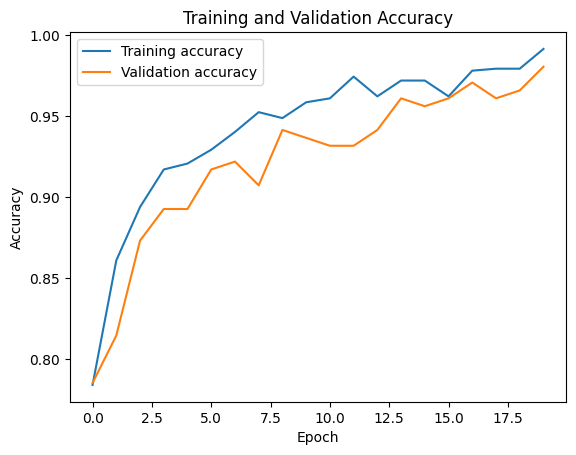

Test accuracy: 98.05%


In [10]:
# Assuming 'X_train_scaled' is your scaled training features and 'y_train' are your training labels

# Train the model
history = best_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,  # You can change this number of epochs
    batch_size=32,  # And the batch size according to your dataset and model complexity
    verbose=1
)

# After training, you can plot the training history:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

loss, accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")


In [14]:
import pandas as pd

new_data = pd.DataFrame({
    'Age': [71],
    'Sex': [0],
    'cp': [0],
    'trestbps': [112],
    'chol': [149],
    'fbs': [0],
    'restecg': [1],
    '.,
}, index=[0])  # Added index=[0]

# Correct the column names to match the training data's column names
new_data.columns = [column.lower() for column in new_data.columns]  # Convert column names to lowercase

# Function to preprocess new data
def preprocess_new_data(new_data, scaler):
    # Assuming new_data is a pandas DataFrame with the same structure as your training data
    # Scale the new data using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data)
    return new_data_scaled

# Function to make predictions with descriptive output
def make_predictions(model, preprocessed_data):
    # Make predictions using the model
    predictions = model.predict(preprocessed_data)
    # Threshold the probabilities for binary classification
    binary_predictions = (predictions > 0.5).astype(int)
    # Interpret the binary predictions
    if binary_predictions[0][0] == 1:
        print("The model predicts that the person is likely to have heart disease.")
    else:
        print("The model predicts that the person is unlikely to have heart disease.")
    return binary_predictions

# Now you can preprocess and make predictions as before
new_data_scaled = preprocess_new_data(new_data, scaler)
binary_predictions = make_predictions(best_model, new_data_scaled)

# Output the predictions
print("Binary predictions on the new data:")
print(binary_predictions)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The model predicts that the person is likely to have heart disease.
Binary predictions on the new data:
[[1]]
